# Euler's method

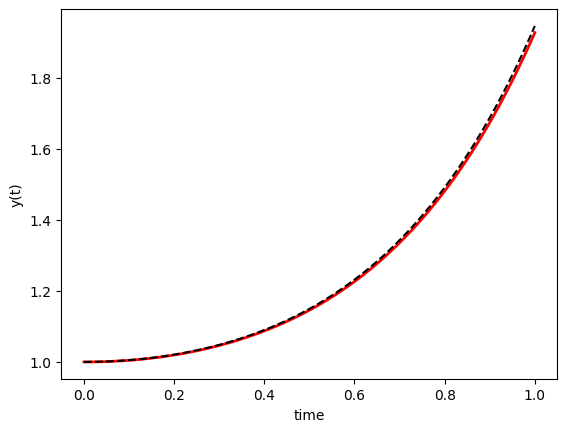

In [28]:
#!usr/bin/env python3

# euler'method :differntial equation

import math
import numpy as np

def f(y,t):
   return t*y+ pow(t,3)

t=np.linspace(0,1,100)
s=0

h=t[1]-t[0]
m=len(t)
y=np.zeros(m)
y[0]=1

for i in range(m-1):
  y[i+1]=y[i]+ h*f(y[i],t[i])


yt=-t*t - 2 + 3*np.exp(t*t/2)

import matplotlib.pyplot as plt
# plt.plot(t,y,'bs')        # plot
plt.plot(t,y, color='r', linewidth =2)        # plot
plt.plot(t,yt,'--', color= 'black')        # plot
plt.xlabel("time")
plt.ylabel("y(t)")
plt.show()


# Improved Euler's method

1.0


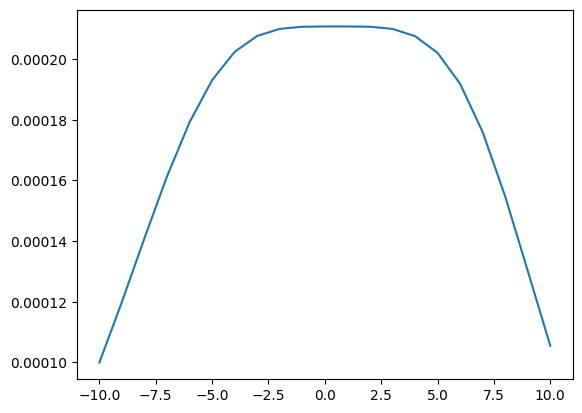

In [5]:
#!usr/bin/env python3

# Improved (Trapezoid) euler'method :differntial equation

import math
import numpy as np

def f(y,t):
   return -4*t*t*t*y*y

t=np.linspace(-10,10,21)

s=0

h=t[1]-t[0]
m=len(t)
y=np.zeros(m)
y[0]=1/10001
print(h)
for i in range(m-1):
  y[i+1] = y[i]+ (h/2) * (f(y[i],t[i]) + f(t[i]+h,h*f(y[i],t[i])))
  


import matplotlib.pyplot as plt
plt.plot(t,y)        # plot
plt.show()


# Runge Kutta 2nd order

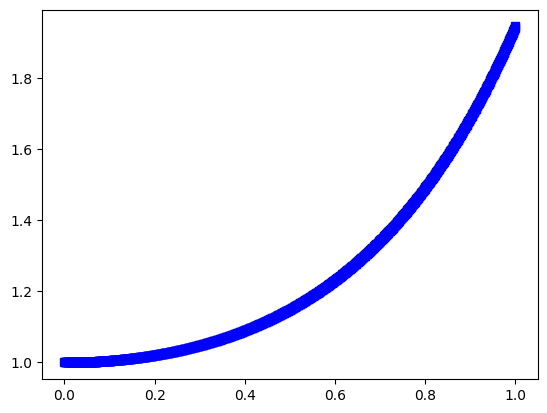

In [6]:
#!usr/bin/env python3

# RK2 method :differntial equation

import math
import numpy as np

def f(t,y):
   return t*y+ pow(t,3)

t=np.linspace(0,1,1000)
s=0

h=t[1]-t[0]
m=len(t)
w=np.zeros(m)
w[0]=1

for i in range(m-1):
  w[i+1]=w[i]+ h*f(t[i]+h/2, w[i]+ (h/2)*f(t[i],w[i]))
  


import matplotlib.pyplot as plt
plt.plot(t,w,'bs')        # plot
plt.show()


# Runge Kutta 4th order

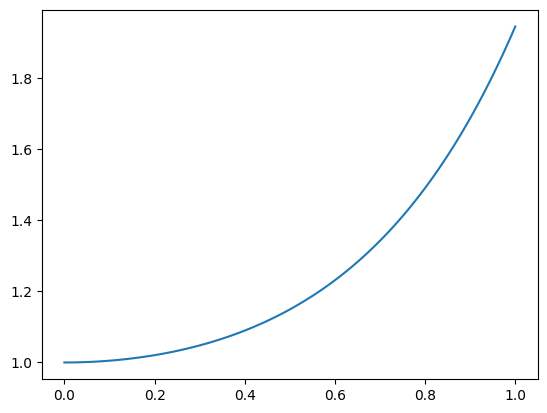

In [7]:
#!usr/bin/env python3

# RK4 method :differntial equation

import math
import numpy as np

def f(t,y):
   return t*y+ pow(t,3)

t=np.linspace(0,1,101)
s=0

h=t[1]-t[0]
m=len(t)
w=np.zeros(m)
w[0]=1

for i in range(m-1):
  s1=f(t[i],w[i])
  s2=f(t[i]+h/2, w[i]+(h/2)*s1)
  s3=f(t[i]+h/2, w[i]+(h/2)*s2)
  s4=f(t[i]+h, w[i]+ h*s3)
  w[i+1]=w[i]+ (h/6)*(s1+2*s2+2*s3+s4)
  


import matplotlib.pyplot as plt
plt.plot(t,w)        # plot
plt.show()


# Heat equation

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [3.45491503e-01 3.55784963e-01 3.62983970e-01 ... 3.19628654e-07
  2.97059317e-07 2.76055986e-07]
 [9.04508497e-01 8.60904701e-01 8.18103804e-01 ... 1.71083454e-07
  1.58429702e-07 1.46698982e-07]
 ...
 [9.04508497e-01 8.33956073e-01 7.68600118e-01 ... 6.58923211e-11
  5.97397770e-11 5.41611029e-11]
 [3.45491503e-01 3.12181167e-01 2.82082425e-01 ... 4.15748698e-12
  3.75664561e-12 3.39445109e-12]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


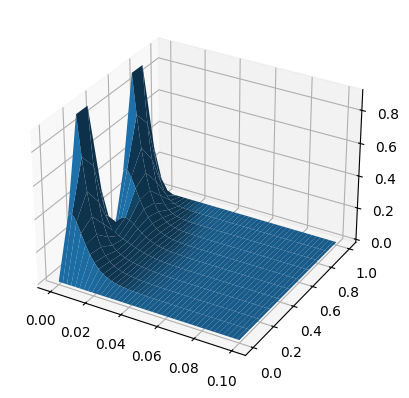

In [9]:
#!/usr/bin/env python3

# PDE Solution by Forward difference method
import numpy as np

def solve_heateq_fd(D, ic_func, M, N):
    a=0
    b=1
    # discretization
    h =1/M
    k = 0.1/N
    x = np.linspace(a, b, M)
    #t = np.linspace(T0, T, N)
    #print(x)
    
    # solution points
    w = np.zeros((M,N))
    
    # initial condition values
    for i in range(M):
        w[i,0] = ic_func(x[i])
        
    # boundary points
    #bc_left, bc_right = bc_func
    for j in range(M):
        w[0,j] = 0.0
        w[M-1,j] =0.0 
    
    # Construct iteration matrix
    sigma = D*k/(h*h)
    s = 1.0 - 2.0*sigma
    P = M-2
    A = np.zeros((P,P))       
    for i in range(P):
        A[i,i] = s
    for i in range(0,P-1):
        A[i,i+1] = sigma
    for i in range(1,P):
        A[i-1,i] = sigma
    #print(A.shape)
    #print(w[1:M-1,1:2].shape)
    
    for j in range(0,N-1):
        w[1:M-1,j+1] = np.dot(A, w[1:M-1,j])
        w[1,j+1] += sigma * w[0,j]
        w[M-1,j+1] += sigma * w[M-1,j]
        
    return w


# problem definition
def ic_func(x):
    y = np.sin(2.0*np.pi*x)
    return y*y



m = 1.0/0.1
n = 1.0/0.004
M = int(m)+1
N = int(n)+1

D = 1.0
w = solve_heateq_fd(D,  ic_func, M, N)
print(w)

# Plot the solutions
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.linspace(0, 1.0, M)
t = np.linspace(0, 0.1, N)
X, Y = np.meshgrid(t, x)
ax.plot_surface(X, Y, w)

plt.show()



